### Imports and Downloads

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from graph_coloring_problem import obtain_colours
from adjacent_matrix import create_adjacent_matrix

### Loading Catalonia's Map

In [2]:
def number_to_discrete_color(index, total_colors):
    cmap = plt.get_cmap('tab20b', total_colors)
    rgba = cmap(index / total_colors)
    return mcolors.to_hex(rgba)

In [3]:
# Load the shapefile (this path assumes you have the shapefile locally)
gdf = gpd.read_file('./COMARQUES/divisions-administratives-v2r1-comarques-250000-20240701.shp')
gdf['NOM'] = gdf['NOMCOMAR']
"""gdf = gpd.read_file('./MUNICIPIS/divisions-administratives-v2r1-municipis-250000-20240701.shp')
gdf['NOM'] = gdf['NOMMUNI']"""

matrix = create_adjacent_matrix(gdf)

### Searching the best parameters

In [4]:
population_sizes = [100, 200, 300]
mutation_probs = [0.1, 0.15, 0.2]
max_generations = [200, 500, 800]
crossover_types = ['one-point', 'two-point', 'uniform']

results = []

for population_size in population_sizes:
    for prob_mutation in mutation_probs:
        for max_gen in max_generations:
            for crossover_type in crossover_types:
                
                num_colors_list = []
                for _ in range(10):
                    print(population_size, prob_mutation, max_gen, crossover_type)
                    _, report_data, _, _ = obtain_colours(matrix, population_size=population_size,
                                                        prob_mutation=prob_mutation, 
                                                        max_generations=max_gen,
                                                        crossover_type=crossover_type, 
                                                        crossover_prob=0.5)
                    report_data = report_data.iloc[-1]

                    num_colors_list.append(report_data['Number colors'])

                mean_num_colors = np.mean(num_colors_list)
                
                results.append({
                    'Population Size': population_size,
                    'Mutation Probability': prob_mutation,
                    'Max Generations': max_gen,
                    'Crossover Type': crossover_type,
                    'Mean Number of Colors': mean_num_colors
                })

results_df = pd.DataFrame(results)

100 0.1 200 one-point
Number of colors: 7, Generation: 38
Number of colors: 6, Generation: 39
Number of colors: 5, Generation: 35
100 0.1 200 one-point
Number of colors: 7, Generation: 29
Number of colors: 6, Generation: 30
Number of colors: 5, Generation: 42
100 0.1 200 one-point
Number of colors: 7, Generation: 28
Number of colors: 6, Generation: 43
100 0.1 200 one-point
Number of colors: 7, Generation: 33
Number of colors: 6, Generation: 30
100 0.1 200 one-point
Number of colors: 7, Generation: 28
Number of colors: 6, Generation: 84
Number of colors: 5, Generation: 38
100 0.1 200 one-point
Number of colors: 7, Generation: 40
Number of colors: 6, Generation: 36
Number of colors: 5, Generation: 62
100 0.1 200 one-point
Number of colors: 7, Generation: 45
Number of colors: 6, Generation: 36
100 0.1 200 one-point
Number of colors: 7, Generation: 40
Number of colors: 6, Generation: 50
Number of colors: 5, Generation: 56
100 0.1 200 one-point
Number of colors: 7, Generation: 35
Number of 

KeyboardInterrupt: 

In [12]:
best_combination = results_df.loc[results_df['Mean Number of Colors'].idxmin()]

print("Best combination of parameters:", best_combination)

Best combination of parameters:
Population Size              300
Mutation Probability         0.1
Max Generations              500
Crossover Type           uniform
Mean Number of Colors        4.4
Name: 59, dtype: object


### Analysis with the best Parameters

In [4]:
# Best parameters
best_population_size = 300
best_mutation_prob = 0.1
best_max_generations = 500
best_crossover_type = 'uniform'

results_df2 = pd.DataFrame(columns=["Num Colors", "Execution Time", "Generations", "Fitness Function Calls"])

for i in range(10):
    best_palette, results_df, _, execution_time = obtain_colours(
        matrix,
        population_size=best_population_size,
        prob_mutation=best_mutation_prob,
        max_generations=best_max_generations,
        crossover_type=best_crossover_type,
        crossover_prob=0.5 
    )
    
    new_row = {
        "Num Colors": results_df['Number colors'],
        "Execution Time": execution_time,
        "Generations": results_df['Generation'],
        "Fitness Function Calls": results_df['Fitness evaluations'],
    }
    results_df2 = results_df2._append(new_row, ignore_index=True)

Number of colors: 7, Generation: 44
Number of colors: 6, Generation: 69
Number of colors: 5, Generation: 48


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7268\1382829643.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df2 = results_df2._append(new_row, ignore_index=True)


Number of colors: 7, Generation: 58
Number of colors: 6, Generation: 43
Number of colors: 5, Generation: 43
Number of colors: 7, Generation: 48
Number of colors: 6, Generation: 46
Number of colors: 5, Generation: 69
Number of colors: 7, Generation: 47
Number of colors: 6, Generation: 59
Number of colors: 5, Generation: 54
Number of colors: 7, Generation: 38
Number of colors: 6, Generation: 53
Number of colors: 5, Generation: 60
Number of colors: 7, Generation: 57
Number of colors: 6, Generation: 56
Number of colors: 5, Generation: 68
Number of colors: 4, Generation: 57
Number of colors: 7, Generation: 59
Number of colors: 6, Generation: 49
Number of colors: 5, Generation: 60
Number of colors: 4, Generation: 76
Number of colors: 7, Generation: 58
Number of colors: 6, Generation: 48
Number of colors: 5, Generation: 62
Number of colors: 7, Generation: 43
Number of colors: 6, Generation: 59
Number of colors: 5, Generation: 75
Number of colors: 7, Generation: 62
Number of colors: 6, Generat

In [23]:
results_df2

,Num Colors,Execution Time,Generations,Fitness Function Calls
0,4.0,6.527076,249.0,74700.0
1,5.0,5.682045,151.0,45300.0
2,5.0,5.660077,153.0,45900.0
3,5.0,5.658298,156.0,46800.0
4,4.0,6.232422,227.0,68100.0
5,5.0,5.648428,152.0,45600.0
6,5.0,5.610181,147.0,44100.0
7,5.0,5.492466,135.0,40500.0
8,4.0,6.523298,258.0,77400.0
9,4.0,6.358896,238.0,71400.0


### Plots

In [5]:
color_numbers, report_data, report_data2, time = obtain_colours(matrix, population_size = 300, prob_mutation = 0.1, max_generations = 500,
                        crossover_type = 'uniform', crossover_prob = 0.5)

# Get the unique numbers from the list and assign each a color
unique_numbers = list(set(color_numbers))
total_unique_colors = len(unique_numbers)

# Create a dictionary mapping each unique number to a color
number_color_mapping = {num: number_to_discrete_color(i, total_unique_colors) for i, num in enumerate(unique_numbers)}

# Now map each comarca name to its corresponding color based on its number
comarca_colors = {name: number_color_mapping[num] for name, num in zip(gdf['NOM'], color_numbers)}

Number of colors: 7, Generation: 52
Number of colors: 6, Generation: 51
Number of colors: 5, Generation: 49


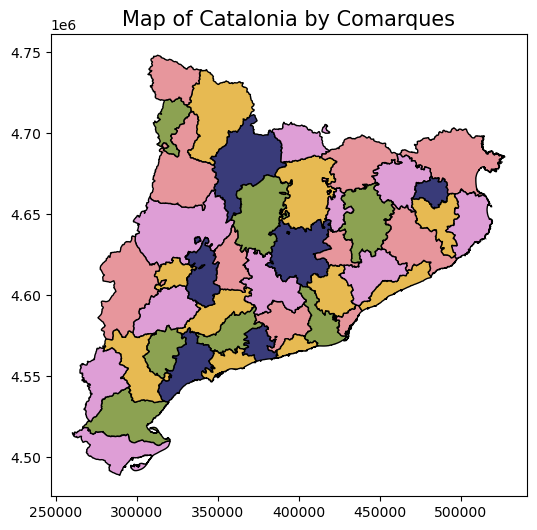

In [6]:
# Create a new column for colors based on the comarca names
gdf['color'] = gdf['NOM'].map(comarca_colors).fillna('#FFFFFF')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
gdf.plot(ax=ax, color=gdf['color'], edgecolor='black')
ax.set_title("Map of Catalonia by Comarques", fontsize=15)
plt.show()

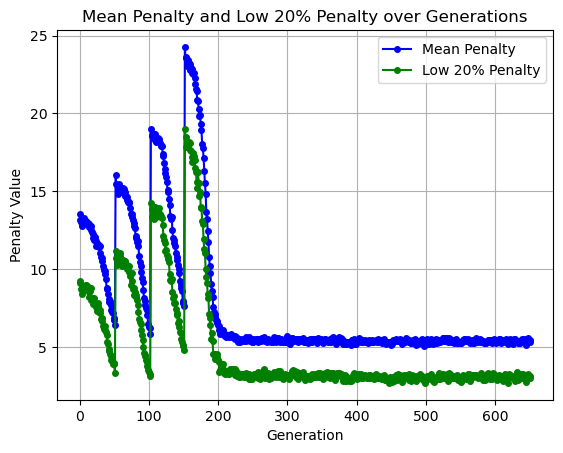

In [7]:
plt.plot(report_data2['Generation'], report_data2['Mean Penalty'], label='Mean Penalty', marker='o', markersize=4, color='blue')

# Plot for Low 20% Penalty
plt.plot(report_data2['Generation'], report_data2['Low 20% penalty'], label='Low 20% Penalty', marker='o', markersize=4, color='green')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Penalty Value')
plt.title('Mean Penalty and Low 20% Penalty over Generations')

# Add a legend
plt.legend()
plt.grid(True)
plt.show()

# XAVI

In [4]:
data_dict = {"Alt Camp": 32, "Alt Empordà": 12, "Alt Penedès": 27, "Alt Urgell": 6, "Alta Ribagorça": 3, "Anoia": 28, "Bages": 22, "Baix Camp": 35, "Baix Ebre": 42, "Baix Empordà": 13, "Baix Llobregat": 25, "Baix Penedès": 33, "Barcelonès": 24, "Berguedà": 8, "Cerdanya": 9, "Conca de Barberà": 31, "Garraf": 26, "Garrigues": 37, "Garrotxa": 11, "Gironès": 15, "Maresme": 17, "Montsià": 43, "Noguera": 5, "Osona": 19, "Pallars Jussà": 4, "Pallars Sobirà": 2, "Pla d'Urgell": 38, "Pla de l'Estany": 14, "Priorat": 36, "Ribera d'Ebre": 40, "Ripollès": 10, "Segarra": 29, "Segrià": 39, "Selva": 16, "Solsonès": 7, "Tarragonès": 35, "Terra Alta": 41, "Urgell": 30, "Val d'Aran": 1, "Vallès Occidental": 23, "Vallès Oriental": 18, "Moianès": 21, "Lluçanès": 20}

In [5]:
gdf2 = gdf[gdf['NOMCOMAR'].isin(['Ripollès', 'Cerdanya', 'Garrotxa', 'Alt Empordà', "Pla de l'Estany", 'Gironès', 'Baix Empordà', 'Selva'])]
gdf2

,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry,NOM
1,02,Alt Empordà,Figueres,1356.6336,"MULTIPOLYGON (((513762.790 4662390.070, 513760...",Alt Empordà
9,10,Baix Empordà,la Bisbal d'Empordà,701.1631,"MULTIPOLYGON (((498500.270 4622836.920, 498479...",Baix Empordà
14,15,Cerdanya,Puigcerdà,546.3978,"MULTIPOLYGON (((417240.539 4704752.127, 417684...",Cerdanya
18,19,Garrotxa,Olot,733.3229,"POLYGON ((462306.492 4686925.593, 462315.342 4...",Garrotxa
19,20,Gironès,Girona,575.9353,"POLYGON ((494081.526 4662565.750, 494214.685 4...",Gironès
27,28,Pla de l'Estany,Banyoles,263.3198,"POLYGON ((482775.700 4671868.200, 483369.000 4...",Pla de l'Estany
30,31,Ripollès,Ripoll,956.8939,"MULTIPOLYGON (((419785.996 4664417.149, 419923...",Ripollès
33,34,Selva,Santa Coloma de Farners,994.0428,"MULTIPOLYGON (((482696.254 4613155.804, 482689...",Selva


In [6]:
m2 = create_adjacent_matrix(gdf2)

KeyError: 0

In [ ]:
adjacency_matrix = create_adjacent_matrix(gdf)

In [9]:
data_dict = {
    "Alt Camp": 32, "Alt Empordà": 12, "Alt Penedès": 27, "Alt Urgell": 6,
    "Alta Ribagorça": 3, "Anoia": 28, "Bages": 22, "Baix Camp": 35,
    "Baix Ebre": 42, "Baix Empordà": 13, "Baix Llobregat": 25, "Baix Penedès": 33,
    "Barcelonès": 24, "Berguedà": 8, "Cerdanya": 9, "Conca de Barberà": 31,
    "Garraf": 26, "Garrigues": 37, "Garrotxa": 11, "Gironès": 15, "Maresme": 17,
    "Montsià": 43, "Noguera": 5, "Osona": 19, "Pallars Jussà": 4,
    "Pallars Sobirà": 2, "Pla d'Urgell": 38, "Pla de l'Estany": 14,
    "Priorat": 36, "Ribera d'Ebre": 40, "Ripollès": 10, "Segarra": 29,
    "Segrià": 39, "Selva": 16, "Solsonès": 7, "Tarragonès": 35,
    "Terra Alta": 41, "Urgell": 30, "Val d'Aran": 1, "Vallès Occidental": 23,
    "Vallès Oriental": 18, "Moianès": 21, "Lluçanès": 20
}

# Assuming gdf is your GeoDataFrame
# Create a list of names ordered by their corresponding values in data_dict
ordered_names = sorted(data_dict, key=data_dict.get)

# Reorder gdf based on this ordered list
gdf_sorted = gdf.set_index('NOMCOMAR').reindex(ordered_names).reset_index()

# Create an index map for the ordered names
index_map = {name: idx for idx, name in enumerate(ordered_names)}

# Reorder the adjacency matrix (assuming it's a NumPy array)
# Create a new reordered adjacency matrix
adjacency_matrix_sorted = np.zeros_like(adjacency_matrix)

# Fill in the reordered adjacency matrix
for new_idx, name in enumerate(ordered_names):
    original_idx = index_map[name]
    adjacency_matrix_sorted[new_idx, :] = adjacency_matrix[original_idx, :]
    adjacency_matrix_sorted[:, new_idx] = adjacency_matrix[:, original_idx]

NameError: name 'adjacency_matrix' is not defined

In [10]:
results = {}
for matrix, name in [(adjacency_matrix_sorted, 'OAM'), (adjacency_matrix, 'AM'), ]:
    results[name] = {'time': [], 'colors': []}
    for i in range(5):
        color_numbers, report_data, time = obtain_colours(matrix, population_size = 300, prob_mutation = 0.2, max_generations = 500,
                        crossover_type = 'one-point', crossover_prob = 0.5)
        results[name]['colors'].append(len(np.unique(color_numbers)))
        results[name]['time'].append(time)
        print(color_numbers)

NameError: name 'adjacency_matrix_sorted' is not defined